In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import SimpleITK as sitk

from radiomics import featureextractor

In [ ]:
root = '/media/osfa/463501e0-d62c-45c4-ad10-c1efbf8fc752/Project/tmt_3d/label_nii'

radiomics_features_train = '/media/linh/hdd4TA/Linh/src/survival/feature_radiomic/radiomics_features_1409_train.csv'

In [ ]:
df_train = pd.read_csv('/media/linh/hdd4TA/Linh/dataset/brats2018/train/survival_data.csv')
df_train.head()

In [ ]:
folder_ids = df_train.iloc[:,0].tolist()
len(folder_ids)
df_out = pd.DataFrame()

feat = {}

In [ ]:
for idx in range(0, len(folder_ids)):
    
    print(folder_ids[idx])
    
    t1ce_img =  sitk.GetImageFromArray(nib.load("{}/{}/{}_t1ce.nii.gz".format(root, folder_ids[idx], folder_ids[idx])).get_fdata())
    mask = nib.load("{}/{}/{}_seg.nii.gz".format(root, folder_ids[idx], folder_ids[idx])).get_fdata()
    mask[mask>0] = 1
    new_mask = sitk.GetImageFromArray(mask)
    
    extractor = featureextractor.RadiomicsFeatureExtractor(t1ce_img, new_mask, label=1)
    extractor.enableAllFeatures()
    radiomics_features = extractor.execute(t1ce_img, new_mask, label=1)
    
    for (key, val) in radiomics_features.items():
        feat['whole_tumor_' + key] = val
        
    print("Extracted features from person {}/{}".format(idx + 1, len(folder_ids)))
    print("_____________________________________________________________________")
    
    df_temp = pd.DataFrame(data=[list(feat.values())], columns=list(feat.keys()))
    df_out = pd.concat([df_out, df_temp], axis=0)
    
df_out.to_csv(radiomics_features_train, index = True, header=True)

print('Process ends!')

In [ ]:
df_new = pd.read_csv("/media/linh/hdd4TA/Linh/src/survival/feature_radiomic/radiomics_features_1409_train_WT.csv")
df_new.head()

In [ ]:
df_final = pd.concat([df_train['BraTS18ID'], df_new], axis=1)

In [ ]:
df_final.head()

In [4]:
from playsound import playsound
playsound('/home/osfa/Music/KSHMR & Marnik - Bazaar (Official Sunburn Goa 2015 Anthem) [Official Music Video].mp3')

In [2]:
!pip install playsound

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7026 sha256=8bb873d7f0e3a5ce11ac8b01cfabffca72f95731685ede763b7225219554bc62
  Stored in directory: /home/osfa/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


<AxesSubplot:xlabel='timeline'>

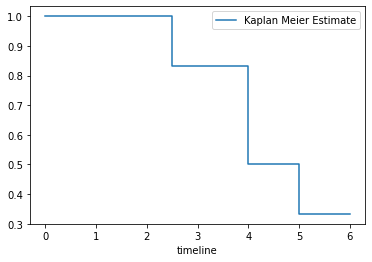

In [8]:
import lifelines
from lifelines import KaplanMeierFitter

## Example Data 
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

In [10]:
##  create a dataframe
import pandas as pd
df = pd.read_csv("/media/osfa/463501e0-d62c-45c4-ad10-c1efbf8fc752/Project/Clinical/preprocess_dataset/dataset.csv") 

In [11]:
df

PatientID  gender        age  Survival_time  Mcode_new  Histology_new  \
0      LC00009       1  78.139726             74          7              3   
1      LC00012       1  64.032877            330         11              0   
2      LC00013       1  69.904110            411          7              3   
3      LC00021       1  65.367123             29         11              0   
4      LC00022       0  45.632877            548         11              0   
...        ...     ...        ...            ...        ...            ...   
2682   LC10091       1  59.372603            842          7              3   
2683   LC10093       0  48.791781            585         11              0   
2684   LC10094       0  60.895890              8         11              0   
2685   LC10096       1  56.046575            798          7              3   
2686   LC10097       0  76.810959            526         11              0   

      Overall.stage  Clinical.T.Stage  Clinical.N.stage  Clinical.M.stage  \
0                 4                 3                 2                 0   
1                 5                 3                 3                 1   
2                 4                 1                 2                 0   
3                 6                 4                 3                 1   
4                 6                 1                 3                 1   
...             ...               ...               ...               ...   
2682              2                 1                 1                 0   
2683              6                 4                 2                 1   
2684              4                 2                 2                 0   
2685              1                 2                 0                 0   
2686              6                 4                 2                 1   

      Smoking.status  Smoking.amount  Deadstatus.event  
0                  1            50.0                 1  
1                  1            40.0                 1  
2                  0             0.0                 1  
3                  1            30.0                 1  
4                  1            10.0                 1  
...              ...             ...               ...  
2682               1            40.0                 0  
2683               0             0.0                 0  
2684               0             0.0                 9  
2685               1            17.5                 0  
2686               0             0.0                 9  

[2687 rows x 13 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         2687 non-null   object 
 1   gender            2687 non-null   int64  
 2   age               2687 non-null   float64
 3   Survival_time     2687 non-null   int64  
 4   Mcode_new         2687 non-null   int64  
 5   Histology_new     2687 non-null   int64  
 6   Overall.stage     2687 non-null   int64  
 7   Clinical.T.Stage  2687 non-null   int64  
 8   Clinical.N.stage  2687 non-null   int64  
 9   Clinical.M.stage  2687 non-null   int64  
 10  Smoking.status    2687 non-null   int64  
 11  Smoking.amount    2687 non-null   float64
 12  Deadstatus.event  2687 non-null   int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 273.0+ KB


In [23]:
df1 = df

In [24]:
df1

PatientID  gender        age  Survival_time  Mcode_new  Histology_new  \
0      LC00009       1  78.139726             74          7              3   
1      LC00012       1  64.032877            330         11              0   
2      LC00013       1  69.904110            411          7              3   
3      LC00021       1  65.367123             29         11              0   
4      LC00022       0  45.632877            548         11              0   
...        ...     ...        ...            ...        ...            ...   
2682   LC10091       1  59.372603            842          7              3   
2683   LC10093       0  48.791781            585         11              0   
2684   LC10094       0  60.895890              8         11              0   
2685   LC10096       1  56.046575            798          7              3   
2686   LC10097       0  76.810959            526         11              0   

      Overall.stage  Clinical.T.Stage  Clinical.N.stage  Clinical.M.stage  \
0                 4                 3                 2                 0   
1                 5                 3                 3                 1   
2                 4                 1                 2                 0   
3                 6                 4                 3                 1   
4                 6                 1                 3                 1   
...             ...               ...               ...               ...   
2682              2                 1                 1                 0   
2683              6                 4                 2                 1   
2684              4                 2                 2                 0   
2685              1                 2                 0                 0   
2686              6                 4                 2                 1   

      Smoking.status  Smoking.amount  Deadstatus.event  
0                  1            50.0                 1  
1                  1            40.0                 1  
2                  0             0.0                 1  
3                  1            30.0                 1  
4                  1            10.0                 1  
...              ...             ...               ...  
2682               1            40.0                 0  
2683               0             0.0                 0  
2684               0             0.0                 9  
2685               1            17.5                 0  
2686               0             0.0                 9  

[2687 rows x 13 columns]

In [26]:
df1["Deadstatus.event"].replace({"9": "1"}, inplace=True)
df1

PatientID  gender        age  Survival_time  Mcode_new  Histology_new  \
0      LC00009       1  78.139726             74          7              3   
1      LC00012       1  64.032877            330         11              0   
2      LC00013       1  69.904110            411          7              3   
3      LC00021       1  65.367123             29         11              0   
4      LC00022       0  45.632877            548         11              0   
...        ...     ...        ...            ...        ...            ...   
2682   LC10091       1  59.372603            842          7              3   
2683   LC10093       0  48.791781            585         11              0   
2684   LC10094       0  60.895890              8         11              0   
2685   LC10096       1  56.046575            798          7              3   
2686   LC10097       0  76.810959            526         11              0   

      Overall.stage  Clinical.T.Stage  Clinical.N.stage  Clinical.M.stage  \
0                 4                 3                 2                 0   
1                 5                 3                 3                 1   
2                 4                 1                 2                 0   
3                 6                 4                 3                 1   
4                 6                 1                 3                 1   
...             ...               ...               ...               ...   
2682              2                 1                 1                 0   
2683              6                 4                 2                 1   
2684              4                 2                 2                 0   
2685              1                 2                 0                 0   
2686              6                 4                 2                 1   

      Smoking.status  Smoking.amount  Deadstatus.event  
0                  1            50.0                 1  
1                  1            40.0                 1  
2                  0             0.0                 1  
3                  1            30.0                 1  
4                  1            10.0                 1  
...              ...             ...               ...  
2682               1            40.0                 0  
2683               0             0.0                 0  
2684               0             0.0                 9  
2685               1            17.5                 0  
2686               0             0.0                 9  

[2687 rows x 13 columns]

In [29]:
df2 = pd.DataFrame({"column1": ["a", "b", "a"]})
df2

column1
0       a
1       b
2       a

In [109]:
df3 = pd.read_csv("/media/osfa/463501e0-d62c-45c4-ad10-c1efbf8fc752/Project/Clinical/preprocess_dataset/dataset1.csv")
df3

PatientID  gender        age  Survival_time  Mcode_new  Histology_new  \
0      LC00009       1  78.139726             74          7              3   
1      LC00012       1  64.032877            330         11              0   
2      LC00013       1  69.904110            411          7              3   
3      LC00021       1  65.367123             29         11              0   
4      LC00022       0  45.632877            548         11              0   
...        ...     ...        ...            ...        ...            ...   
2682   LC10091       1  59.372603            842          7              3   
2683   LC10093       0  48.791781            585         11              0   
2684   LC10094       0  60.895890              8         11              0   
2685   LC10096       1  56.046575            798          7              3   
2686   LC10097       0  76.810959            526         11              0   

      Overall.stage  Clinical.T.Stage  Clinical.N.stage  Clinical.M.stage  \
0                 4                 3                 2                 0   
1                 5                 3                 3                 1   
2                 4                 1                 2                 0   
3                 6                 4                 3                 1   
4                 6                 1                 3                 1   
...             ...               ...               ...               ...   
2682              2                 1                 1                 0   
2683              6                 4                 2                 1   
2684              4                 2                 2                 0   
2685              1                 2                 0                 0   
2686              6                 4                 2                 1   

      Smoking.status  Smoking.amount  Deadstatus.event  Predicted_time  
0                  1            50.0                 1       55.877299  
1                  1            40.0                 1        8.865113  
2                  0             0.0                 1       45.368966  
3                  1            30.0                 1       11.337440  
4                  1            10.0                 1      161.861254  
...              ...             ...               ...             ...  
2682               1            40.0                 0      159.312114  
2683               0             0.0                 0       36.864789  
2684               0             0.0                 0       97.571841  
2685               1            17.5                 0        4.990685  
2686               0             0.0                 0       94.297495  

[2687 rows x 14 columns]

In [110]:
ypred = df3.loc[:, ["Predicted_time"]].values
ytime = df3.loc[:, ["Survival_time"]].values
yevent = df3.loc[:, ["Smoking.status"]].values

In [111]:
import torch
dtype = torch.FloatTensor
ytime = torch.from_numpy(yevent).type(dtype)
yevent = torch.from_numpy(yevent).type(dtype)

In [112]:
def R_set(x):
	n_sample = x.size(0)
	matrix_ones = torch.ones(n_sample, n_sample)
	indicator_matrix = torch.tril(matrix_ones)

	return(indicator_matrix)
def c_index(pred, ytime, yevent):
    '''Calculate concordance index to evaluate models.
    Input:
        pred: linear predictors from trained model.
        ytime: true survival time from load_data().
        yevent: true censoring status from load_data().
    Output:
        concordance_index: c-index (between 0 and 1).
    '''
    n_sample = len(ytime)
    ytime_indicator = R_set(ytime)
    ytime_matrix = ytime_indicator - torch.diag(torch.diag(ytime_indicator))
    ###T_i is uncensored
    censor_idx = (yevent == 0).nonzero()
    zeros = torch.zeros(n_sample)
    ytime_matrix[censor_idx, :] = zeros
    ###1 if pred_i < pred_j; 0.5 if pred_i = pred_j
    pred_matrix = torch.zeros_like(ytime_matrix)
    for j in range(n_sample):
        for i in range(n_sample):
            if pred[i] < pred[j]:
                pred_matrix[j, i] = 1
            elif pred[i] == pred[j]:
                pred_matrix[j, i] = 0.5

    concord_matrix = pred_matrix.mul(ytime_matrix)
    ###numerator
    concord = torch.sum(concord_matrix)
    ###denominator
    epsilon = torch.sum(ytime_matrix)
    ###c-index = numerator/denominator
    concordance_index = torch.div(concord, epsilon)
    ###if gpu is being used
    if torch.cuda.is_available():
        concordance_index = concordance_index.cuda()
    ###
    return (concordance_index)

print('C-index of min method: ',c_index(ypred,ytime,yevent) )


C-index of min method:  tensor(0.5159, device='cuda:0')


Text(0.5, 0, 'time $t$')

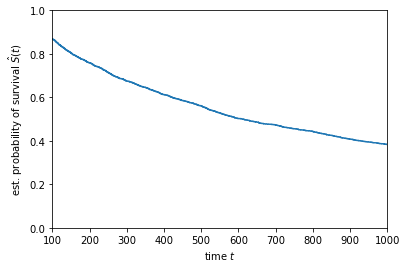

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
time, survival_prob = kaplan_meier_estimator(df3["Deadstatus.event"].astype(bool), df3["Survival_time"])
plt.xlim(100, 1000)
plt.ylim(0, 1)
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
